<a href="https://colab.research.google.com/github/BBiwojno/POSI/blob/main/Cwiczenia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 3

W tych zajęciach będziemy kontynuować pracę z analizą eksploracyjną danych (EDA).

## Wprowadzenie


### Wykrywanie brakujących danych

Brakujące dane mogą występować jako NaN, puste ciągi znaków lub nawet niepoprawnie sformatowane wartości.

Możemy sprawdzić brakujące wartości w każdej kolumnie za pomocą:
```
df.isnull().sum()
```

To zwróci nam łączną liczbę brakujących wpisów w każdej kolumnie.

Możemy również zwizualizować brakujące dane za pomocą prostej mapy ciepła.
```
import matplotlib.pyplot as plt

plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
plt.title("Missing Values Heatmap (True = missing)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()
```

Interpretacja:
Jasne plamy reprezentują brakujące dane — pomaga to szybko zauważyć, które kolumny mają problemy.

### Imputacja (Wypełnianie brakujących danych)
Zamiast usuwać wiersze, możemy zastąpić brakujące dane używając:
- Średnia / Mediana → dla kolumn numerycznych
- Dominanta → dla kolumn kategorycznych
- Pusty ciąg znaków lub niestandardowa wartość → dla tekstu

```
# Example: filling missing values
df["age"] = df["age"].fillna(df["age"].median())
df["income"] = df["income"].fillna(df["income"].mean())
df["city"] = df["city"].fillna(df["city"].mode()[0])
df["notes"] = df["notes"].fillna("")
```

Wyjaśnienie:
Używamy mediany dla wieku, ponieważ jest mniej wrażliwa na wartości odstające,
średniej dla dochodu, ponieważ dobrze reprezentuje średnią,
a dominanta dla kolumn kategorycznych, takich jak miasto.


### Usuwanie brakujących danych
Czasami brakujące dane są zbyt obszerne lub istotne.
W takim przypadku możemy usunąć niekompletne wiersze za pomocą:

```
df = df.dropna(subset=["age", "income"])
```

Wyjaśnienie:  
Pozostawiamy tylko te wiersze, w których zarówno wiek, jak i dochód są obecne.


### Obsługa duplikatów
Zduplikowane wiersze mogą pojawić się podczas importowania danych z wielu źródeł.
Możemy wykryć duplikaty i je usunąć.

```
# Wykrywanie duplikatów
df.duplicated(subset=["id"])

# Usuwanie duplikatów (zostaw pierwsze wystąpienie)
df = df.drop_duplicates(subset=["id"], keep="first")
```

Wyjaśnienie:
Używamy subset=["id"], aby porównywać tylko na podstawie unikalnego identyfikatora.
Duplikaty mogą zaburzać średnie i zliczenia, dlatego ich usunięcie jest kluczowe.


### Usuwanie duplikatów  
Aby usunąć duplikaty (zachowując tylko pierwsze wystąpienie):

```
df_clean = df.drop_duplicates(subset=["id"], keep="first")

print("After removing duplicates:")
print(df_clean)
```

### Analiza jednowymiarowa/jednozmiennowa

#### Czym jest analiza jednowymiarowa?

Analiza jednowymiarowa oznacza analizę jednej zmiennej (kolumny) niezależnie, aby zrozumieć:
- Jakie wartości przyjmuje,
- Jak są rozłożone,
- Czy występują wartości odstające lub brakujące,
- Jakie wzorce lub trendy mogą istnieć.

#### Narzędzia przydatne do analizy jednowymiarowej

Dla danych numerycznych:
- Histogramy
- Wykresy pudełkowe (boxploty)
- Wykresy gęstości

Dla zmiennych kategorycznych:
- wykresy słupkowe
- tabele częstości
- wykresy kołowe

### Analiza dwuwymiarowa i wielowymiarowa

Analiza dwuwymiarowa bada zależności między dwiema zmiennymi,  
natomiast analiza wielowymiarowa analizuje jednocześnie więcej niż dwie zmienne.

Pomaga odpowiedzieć na pytania takie jak:  
- Czy wyższa opłata (fare) zwiększa prawdopodobieństwo przeżycia?  
- Jak wiek jest powiązany z opłatą?  
- Czy płeć wpływa na przeżycie?

#### Zmienna numeryczna a zmienna numeryczna  
Analizujemy, jak dwie zmienne numeryczne są ze sobą powiązane — na przykład wiek a opłata.

Wykres punktowy (Scatter Plot)
```
plt.figure(figsize=(7,5))  
sns.scatterplot(x="age", y="fare", hue="survived", data=df)  
plt.title("Wykres punktowy: Wiek a Opłata (kolorowane wg przeżycia)")  
plt.show()
```

### Mapa cieplna korelacji  
Korelacja mierzy, jak silnie zmienne poruszają się razem.
```
plt.figure(figsize=(8,6))  
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)  
plt.title("Mapa cieplna korelacji")  
plt.show()
```

Interpretacja:  
- Wartości bliskie 1 lub -1 oznaczają silne zależności.  
- Dodatnia → zmienne rosną razem.  
- Ujemna → jedna rośnie, podczas gdy druga maleje.  
- Przykład: opłata (fare) jest ujemnie skorelowana z klasą (pclass) (wyższa klasa → wyższa opłata).

## Zadanie
Twoje zadanie polega na przeprowadzeniu analizy eksploracyjnej danych (**EDA**) na zbiorze danych Titanic.

### Załaduj zbiór danych
- Załaduj zbiór danych (`titanic.csv`).

### Zrozum dane
- **Podgląd danych:** Zobacz pierwsze kilka wierszy, aby zapoznać się z danymi. Użyj metody `.head()` lub jej odpowiednika.
- **Typy danych:** Sprawdź typy danych w każdej kolumnie (np. numeryczne, kategoryczne). Użyj `.info()`, aby sprawdzić obecność brakujących wartości oraz nietypowe typy danych.
- **Sprawdzenie brakujących danych:** Zidentyfikuj kolumny zawierające brakujące dane. Omów sposób ich obsługi (np. imputacja, usuwanie wierszy/kolumn).

### Statystyki podsumowujące
- **Statystyki opisowe:** Oblicz podstawowe statystyki podsumowujące dla kolumn numerycznych (średnia, mediana, odchylenie standardowe, itp.).
- **Dane kategoryczne:** Użyj `.value_counts()`, aby zbadać częstotliwość występowania poszczególnych kategorii w kolumnach kategorycznych, takich jak 'Survived', 'Embarked', itp.

### Wizualizacja danych:

- **Analiza jednozmiennowa:**
  - Dla danych numerycznych użyj histogramów lub wykresów pudełkowych, aby zwizualizować rozkład.
  - Dla danych kategorycznych użyj wykresów słupkowych, aby pokazać częstotliwość różnych kategorii.

- **Analiza dwuzmiennowa:**
  - Zbadaj zależności między dwiema zmiennymi (np. wiek a opłata, przeżycie a płeć, itp.). Użyj wykresów punktowych, wykresów par czy macierzy korelacji.
  - Zwizualizuj wpływ cech kategorycznych (np. płeć, klasa) na zmienną docelową 'Survived'. Użyj wykresów słupkowych, wykresów skumulowanych lub wykresów słupkowych stosunkowych.

- **Macierz korelacji:** Jeśli to istotne, stwórz mapę cieplną, aby zbadać korelacje między cechami numerycznymi.

### Obsługa wartości odstających i anomalii:

- Zidentyfikuj i omów potencjalne wartości odstające lub anomalie w zbiorze danych.
- Zdecyduj, jak będziesz traktować te wartości odstające, jeśli będzie to konieczne.

### Dokumentacja wyników:
- Podsumuj kluczowe wnioski z przeprowadzonej analizy EDA, w tym zauważone wzorce lub zależności, które mogą być szczególnie ważne dla przewidywania przeżycia.
- Dostarcz wizualizacje wspierające Twoje wnioski.

### Ważne:

**Bądź szczegółowy:** Staraj się odkryć jak najwięcej informacji o danych.

**Bądź metodyczny:** Podążaj za logiczną sekwencją kroków — najpierw eksploracja, potem wizualizacja, a na końcu wnioski.

**Bądź klarowny:** Dokumentuj swoje kroki w sposób jasny, aby ktoś nieznający Twojej analizy mógł zrozumieć Twoje wnioski.


Rozmiar zbioru danych: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Brakujące wartości:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket        

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


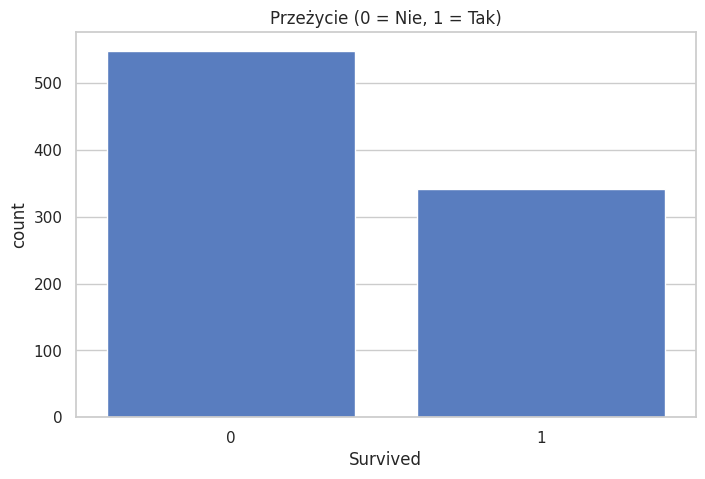

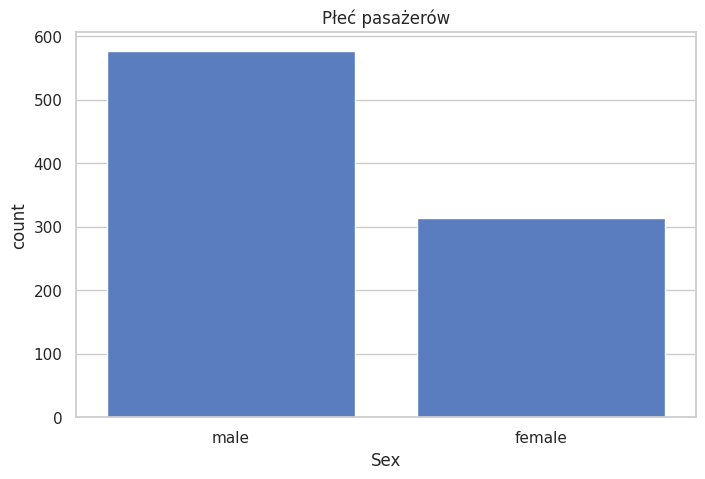

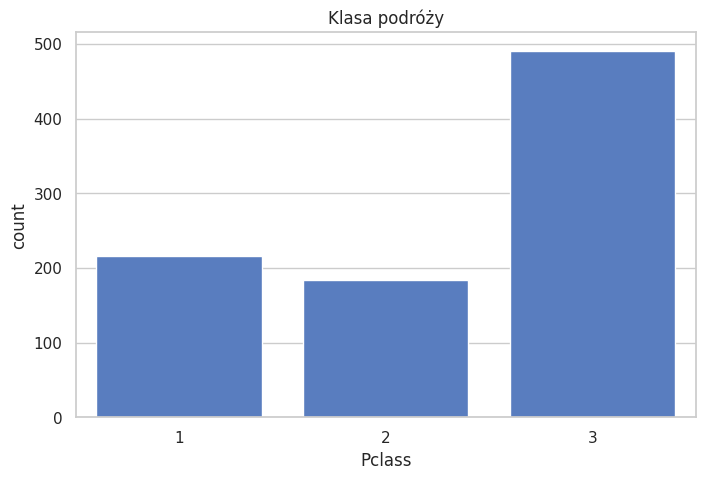

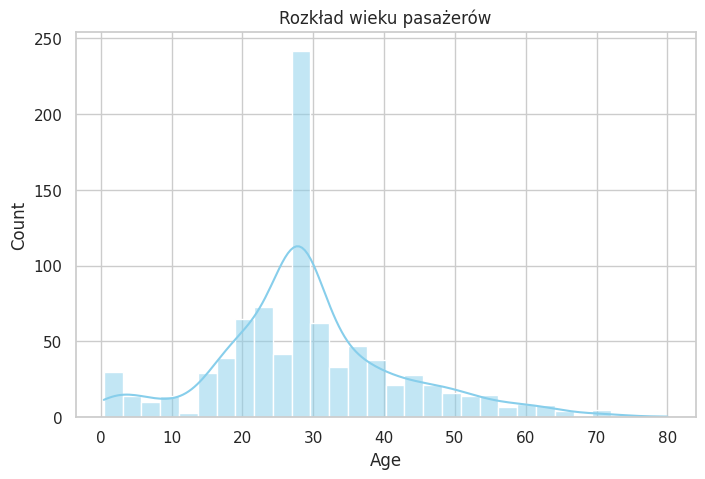

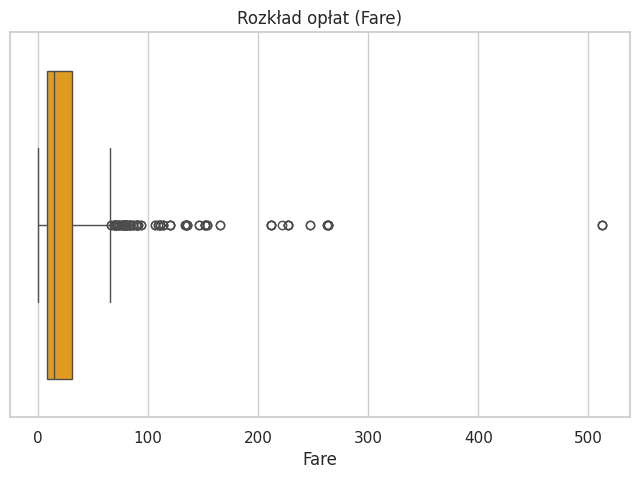

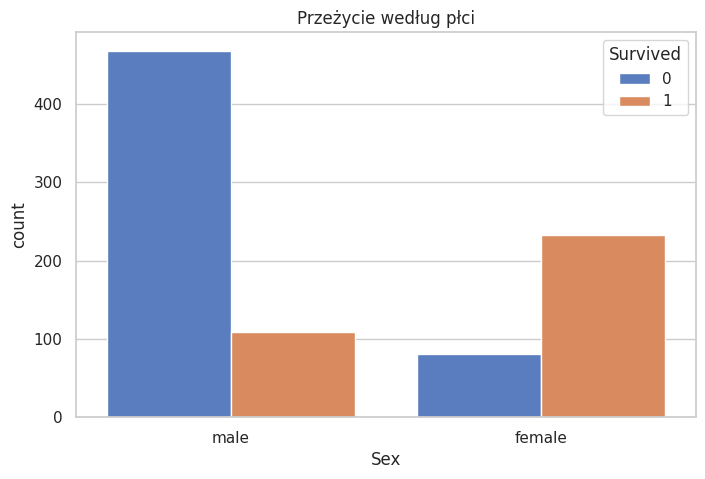

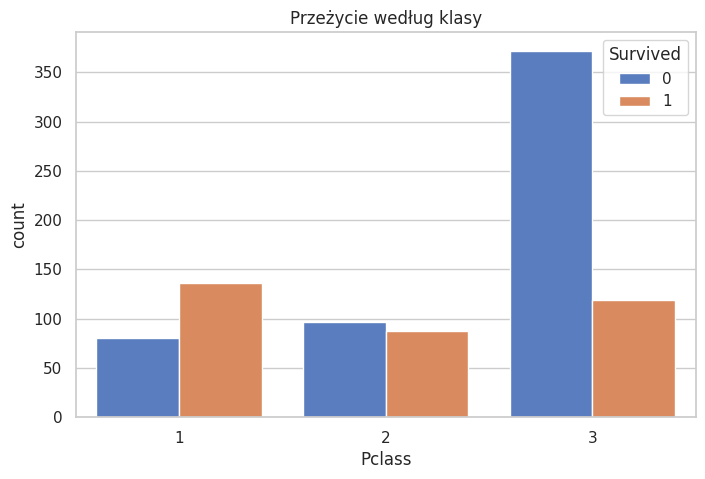

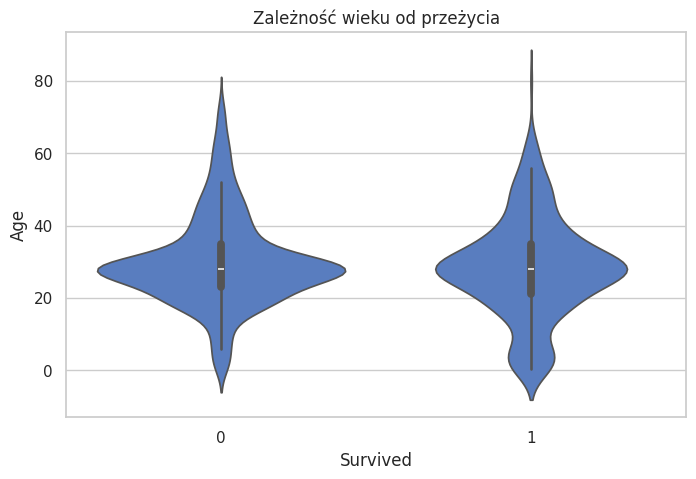

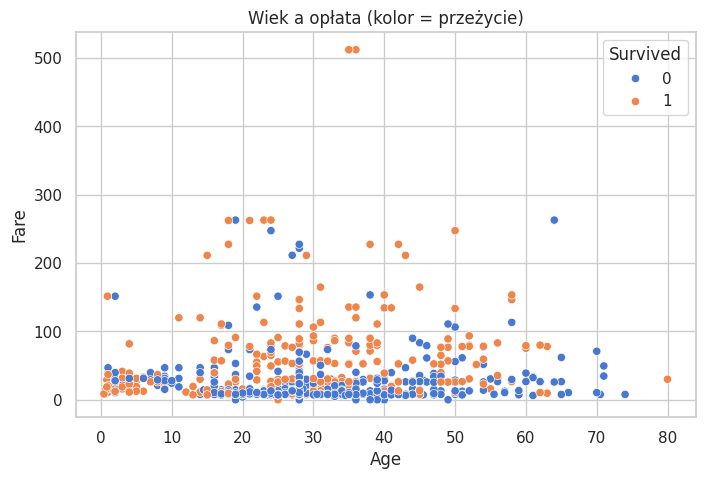

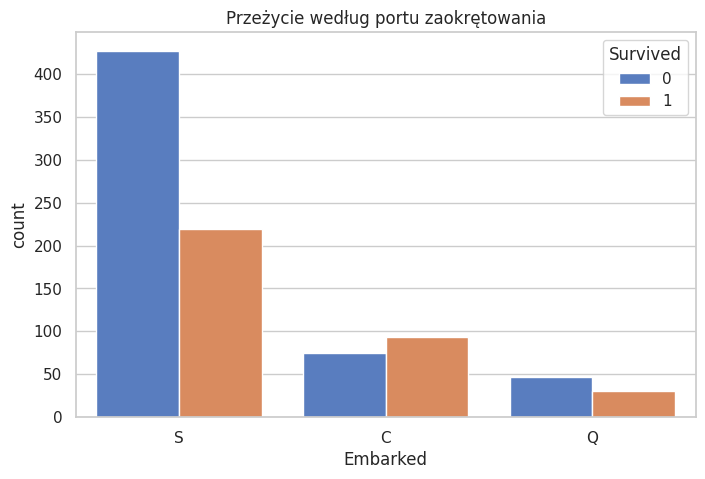

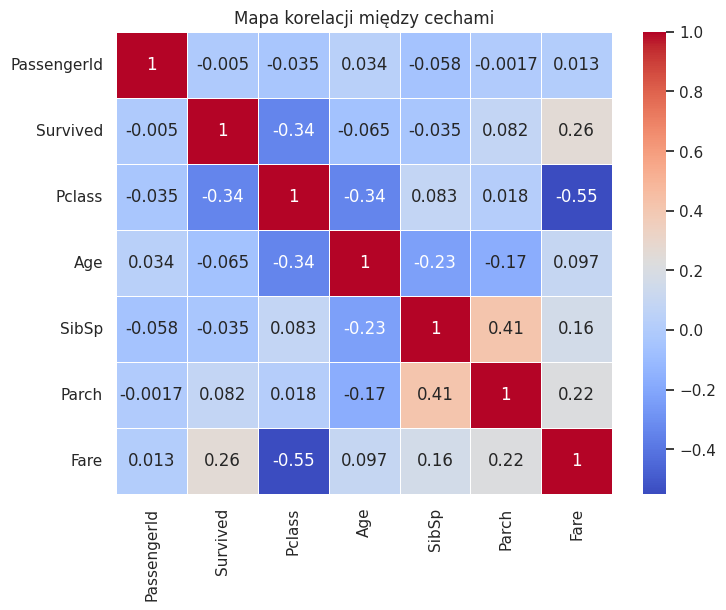

Liczba obserwacji odstających w kolumnie 'Fare': 116


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv("titanic.csv")
print("Rozmiar zbioru danych:", df.shape)
display(df.head())

df.info()
print("\nBrakujące wartości:")
print(df.isnull().sum().sort_values(ascending=False))

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Cabin"] = df["Cabin"].fillna("Brak danych")

print("Brakujące wartości uzupełniono.")
print(df.isnull().sum())

display(df.describe(include="all").T)

sns.countplot(x="Survived", data=df)
plt.title("Przeżycie (0 = Nie, 1 = Tak)")
plt.show()

sns.countplot(x="Sex", data=df)
plt.title("Płeć pasażerów")
plt.show()

sns.countplot(x="Pclass", data=df)
plt.title("Klasa podróży")
plt.show()

sns.histplot(df["Age"], kde=True, color="skyblue", bins=30)
plt.title("Rozkład wieku pasażerów")
plt.show()

sns.boxplot(x="Fare", data=df, color="orange")
plt.title("Rozkład opłat (Fare)")
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Przeżycie według płci")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Przeżycie według klasy")
plt.show()

sns.violinplot(x="Survived", y="Age", data=df)
plt.title("Zależność wieku od przeżycia")
plt.show()

sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Wiek a opłata (kolor = przeżycie)")
plt.show()

sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Przeżycie według portu zaokrętowania")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa korelacji między cechami")
plt.show()

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
odstajace = df[(df["Fare"] < (Q1 - 1.5 * IQR)) | (df["Fare"] > (Q3 + 1.5 * IQR))]
print("Liczba obserwacji odstających w kolumnie 'Fare':", len(odstajace))



Wnioski:
- Przeżyło ok. 38% pasażerów.
- Kobiety częściej przeżyły niż mężczyźni.
- Pasażerowie klasy 1 mieli większe szanse przeżycia.
- Średni wiek to około 30 lat.
- Wyższa cena biletu (Fare) wiąże się z większą szansą na przeżycie.
